In [1]:
import pandas as pd
import numpy as np
import time
import joblib

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from quadratic_weighted_kappa import quadratic_weighted_kappa

from scipy.spatial.distance import pdist,squareform

import xgboost
import shap

In [2]:
x_i = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap7')
traits = joblib.load('df_essay7_traits_sum')
#x_normed = x_i / x_i.max(axis=0)
x_normed = (x_i-x_i.min(axis=0))/(x_i.max(axis=0)-x_i.min(axis=0))

## Find the essays with the nearest and farthest distance

### 1. Original features

### nearest essay-pair

#### MinMax

In [3]:
idx1 = 264
idx2 = 1243

In [8]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  18
The I was patient. One day my mom and I went to the eye doctor. It was my first time going there. We went to this lady and wait for the doctor call us. We sat for @NUM1 minutes band then we hear the doctor calling my name. We go inside the doctors room and I sit down he does all this things. Later he yells us that we have to meet one more doctor. We sat down again and we waited. Then we hear my name again so we go. The worst thing was that I saw a medicine on the table and I was really scared. The lady asked me to look up and open my eyes wide. After that she took the medicine and was going through it in my eyes. I was so scared that when she through the medicine in my eyes it burned a little. I didn`t want her to do the other. I wanted to just stand up and run outside, but I couldn`t she did the other eye and told me to now keep my eyes closed until she came back. When she came back she me that was it, and we were done there. I thought to myself, that wasn`t so bad.
------

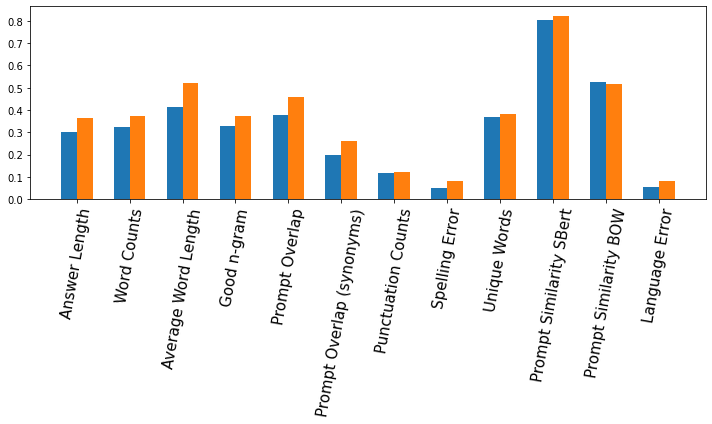

In [9]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [10]:
idx1 = 706
idx2 = 1476

In [11]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  19
I am going to be writing a time when I was patient. Me and my family went to ceder point. and it was this ride called the @CAPS1 the best, and highest roller coaster at ceder point. So we got in line it was so long we had to wait @NUM1 to get on the ride, because the line was so long. So I had my uncle who wasent getting on the ride to go get me some pop, elephant ears, and some chips because I was so hungry and thirsty. So while I was being patient, my other family was not being very patient. I was the only one patient. So @NUM2 past we still in line my family started fussing. @NUM3 hrs past they were getting madder. Then @NUM4 hrs came we were starting to be able to see the roller coaster and people getting on and off. So finally, we got on the ride, we enjoyed it. Then I had to explain how patient I was.  And how unpatient they was not.
-------------------------------------------------------------------
Score :  21
A time when I was being very patient was when I went to 

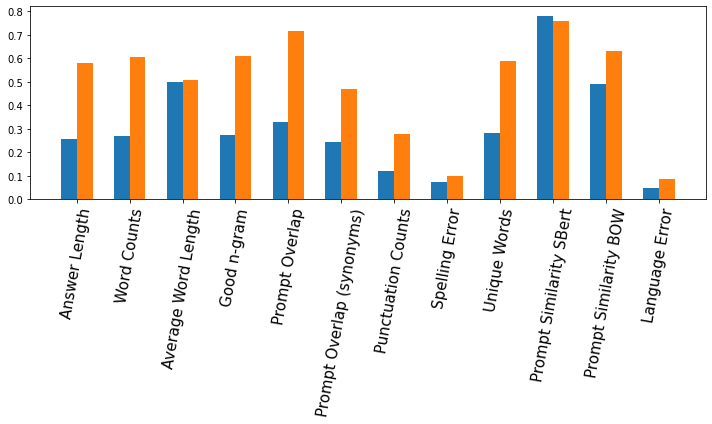

In [12]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [14]:
print("Score : ", traits.loc[801]['domain1_score'])
print(traits.loc[801]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[1306]['domain1_score'])
print(traits.loc[1306]['essay'])

Score :  18
@NUM1 Patience is when you understand and you donât complain. A person who is patient is some     one who can wait and they donât while every two second. A person like that can succeed in life. @NUM2 @CAPS1! @PERSON2 was getting was getting closer. First @PERSON6 then @ORGANIZATION1, @CAPS4, @PERSON7. She was coming town my row next. This was a night more. When is someone going pinch me go I wake up. @NUM3 â@PERSON5.â @PERSON3 and with a disappointed force â@CAPS2 did a poor set on this festâ. I think you should pet on. In my mind I was praying for her not to say the word, she responded, â@CAPS3.â When I got home my mom mad the letter and agreed with it. Why did I have to fall history. Next week the out or came. We sat down she was about to say something so I took a deep breath, you have to be patient and no complaining. I nodded my head with a smile so big with looked like my lips were about to fall off. @NUM4 A few weeks later. I got a little better every 

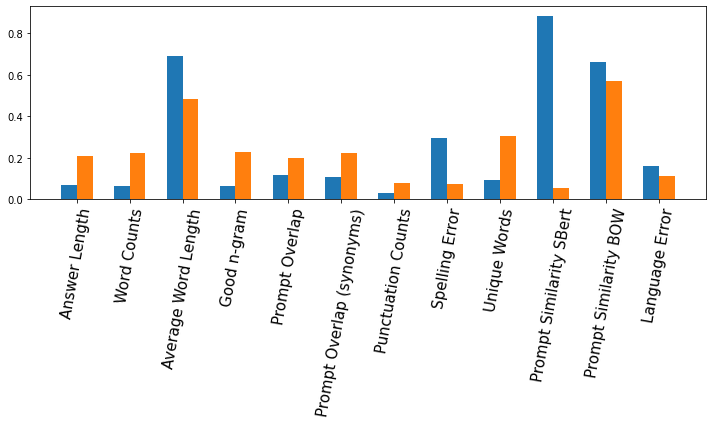

In [15]:
a = x_normed[801][:12]
b = x_normed[1306][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### 2. Original features normalized

### nearest essay-pair

#### MinMax

In [17]:
idx1 = 1250
idx2 = 1279

In [18]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  14
Have you ever been patient? I know it is hard for me to be patient! I usually am not patient because I really like things done right then and there, I dont really like to wait. I can be patient! I can be patient when I am waiting short periods of time. Usually I like to rush, not on my work, but socially, I rush! Being patient means to wait, usually without complaining or moaning. An example of patience is when you are going to a party at @TIME1 and it is @NUM1, you have to wait for a long time! Usually the time seems to go slow! Patience is a quality that is important. That is why I am working hard to try to be patient. You should too!
-------------------------------------------------------------------
Score :  13
In my opinion being patient is when your waiting your turn for some thing. And being impatient means not writing your turn. In your whole life you have patientence because sometimes you might just have to wait. I have patience and I know a lot of people who have

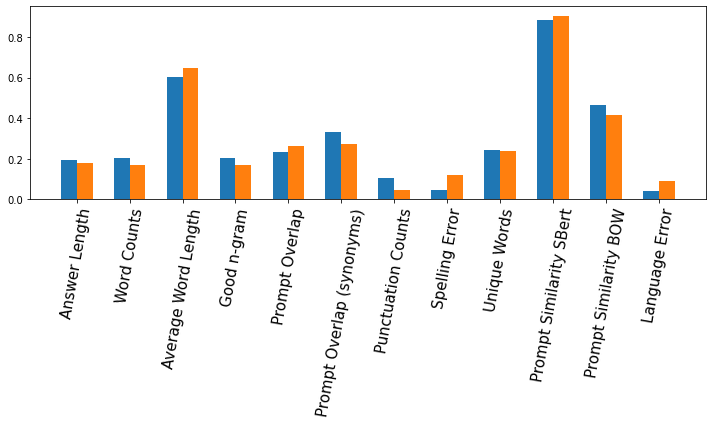

In [19]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [20]:
idx1 = 26
idx2 = 368

In [21]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  6
Patience is when you can take your time at something. When your able to wait, not in a hurry pushing shuvinig  an rushing like some thing bad happen. Being patient also means that you are understanding when it come to tolerents and it when you are calm, cool, peace an love!!!
-------------------------------------------------------------------
Score :  11
Patience is the key to life some say. I dont really know if it is or not. Patience is when your quite, you can wait for things. It is when you can do hardstuff with out feeling frustration, anger, or sadness. When you have patience is when you can do things with ease you can do it without difficulties. Patience is self respecting, kind fair and not self seeking. Patience is respect not disrespect, patience has no evil, paticence does not boast. Patience does not lie, it makes things better when they are difficulty. It makes it easier to focus and do things better. It helps to wait for things.


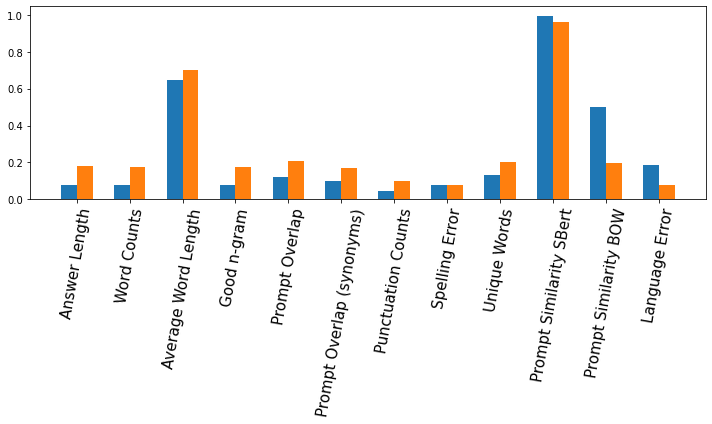

In [22]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [23]:
print("Score : ", traits.loc[262]['domain1_score'])
print(traits.loc[262]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[342]['domain1_score'])
print(traits.loc[342]['essay'])

Score :  17
@PERSON1 was swinging with her friend all day when she was swinging so high that the chain came loose and @PERSON1 fell, she was screaming in pain. So they waked in the house. When they got to the house @PERSON1 was screaming and crying they all got in the car and drove to the doctors. The nurse said that she had to wait an hour to see the doctor. @PERSON1 wasnât patient until her and her friend were talking. When the doctor was ready to see her she had forgot all about why she was there, @PERSON1 found out that she broke her arm. Later that day she thanked her mom and then called her friend and thanked her for helping her be patient.
-------------------------------------------------------------------
Score :  8
I am a very patient person. An example are games. For some games you have to wait weeks, or months. For others you might have to wait years. I have done this before.


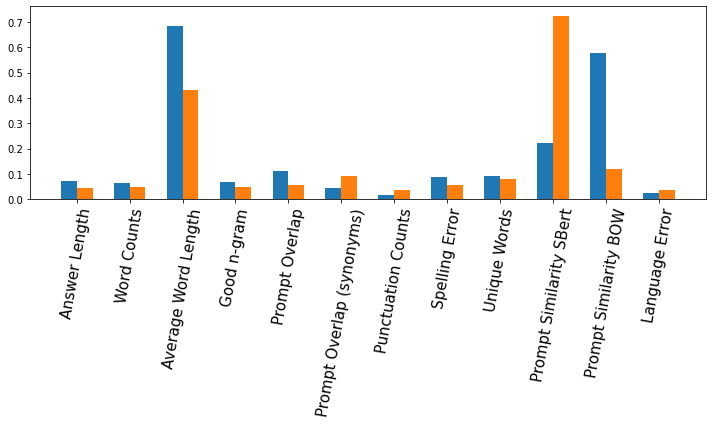

In [24]:
a = x_normed[262][:12]
b = x_normed[342][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### 3. PCA

### nearest essay-pair

#### MinMax

In [16]:
idx1 = 639
idx2 = 1422

In [17]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  20
One time my @CAPS3 planned a fishing trip to @LOCATION1. @CAPS8 @CAPS1t know. He told me to pack my suit case for three days worth of clothes I said why he said we are going to @LOCATION1 tomorrow with your causins @PERSON1 and ryan. I was so excited that I flew to my room and pounded cloths in my @CAPS2 and looked through everything I would need. I asked my @CAPS3 what we were doing there he said were going on a fishing trip in the @CAPS4 river for pike. The @CAPS5 @CAPS6 I got a new cherrywood fishing pole and a really nice underspin real. So I got my fishing poles ready packed my @CAPS7 and went to sleep so I could get up early. @NUM1 am come and my alarm went off I was so tierd I could barely see @CAPS8 we had to be at my uncles house at @NUM2 so I had to get ready. Once we got to my uncles house we met them then we all left. I wanted to sleep in the car @CAPS8 I couldnt once we got in @LOCATION1 it was so cool with the huge cliffs and hills we even sas a bear @CAPS10

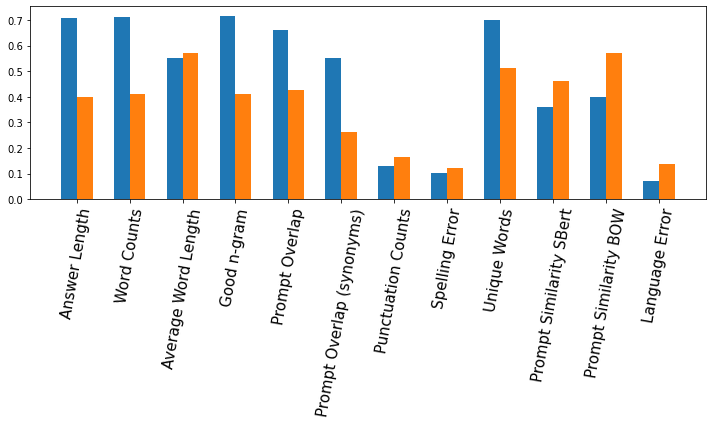

In [18]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [19]:
idx1 = 10
idx2 = 203

In [20]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  16
You know that life is so much harder when you dont have the patients. If you dont then Im going to tell you why. There was a time that found out I was going to @LOCATION1 now thats the good part but when I ask how are we getting there? we had to fly and right then and there I knew I was going to have to be very patient and I thought I didnt have enough patients to fly to @LOCATION1. Although I got through it. Now the worst thing was when I got to @LOCATION1 it was very hot out. We had to stand outside to wait for the bus. It got so hot that I lost all my patients and got so angry at everyone that I thought I was going to blow up! Only because I didnt want to wait for the ride anymore. Haha I came to my sences and I start out it was why easier to wait and the bus eventaly showed up and I already felt way better.
-------------------------------------------------------------------
Score :  17
A time where someone I know was impatient was in my science class during a la

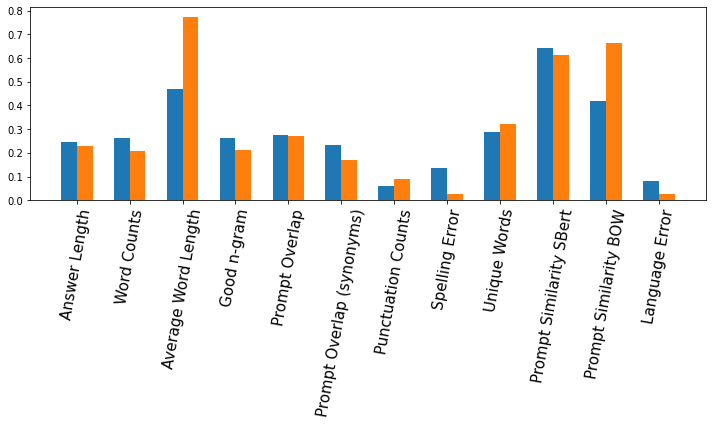

In [21]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [22]:
print("Score : ", traits.loc[62]['domain1_score'])
print(traits.loc[62]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[952]['domain1_score'])
print(traits.loc[952]['essay'])

Score :  17
There are many times when lve been patient but here are just a few. It was a late afternoon my family & I were supposed to go to a big function that day. Like always I didnt know what I was going to wear, about an hour later I found what I was going to wear. I went down stairs to the soon no one was ready & we only had @NUM1 1/@NUM1 an hour left. I was frustrated told everyone to go get ready, but nobody listened to me. But I didnt care so I went up to fore a shower right  when was as out to go in my mom come and told me I had to wait ??? She took a shower. Then one by one everyone took a shower except for me. I was loosing my patients. I still waited because I didnt want to start a commotion. Finally I went into take a shower. We were all dressed & ready to go. At the last minutes when we all got in the car, my sister for got her bag & jacket so we had to wait till she got it. We finally made it to the party, not on time but at least we made it. In conclusion, a few ex

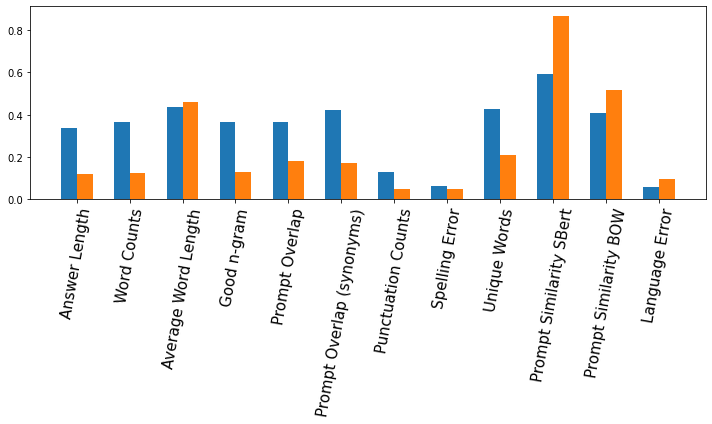

In [23]:
a = x_normed[62][:12]
b = x_normed[952][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### 4. t-SNE

### nearest essay-pair

#### MinMax

In [24]:
idx1 = 12
idx2 = 600

In [25]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  17
A time I was patient was @DATE1, when I was in line to ride the dragster in @CAPS1 point. I was super hot day, I was at @CAPS1 point with my best friend and we were geting ready to get on the dragster. The line is about an hour long and the sun is beating down on you so to me it felt like forever. Just as we were about to go on the ride they steped us because the ride wasent working right. So we had to wait another @NUM1 mins. Luckly my best firend and I had good patients unlike some of the other people who stormed out of there in the first five minutes. We waited and got on the ride and it was one of the most fun experences of my life. Im so happy we waited said @PERSON1 my best firend. Some people have patient like  @PERSON1 and I, and some dont like the the people who ran of there. Im glade we waited or that would not have happened. In this case patient was a great thing for @PERSON1 and I.
-------------------------------------------------------------------
Score :

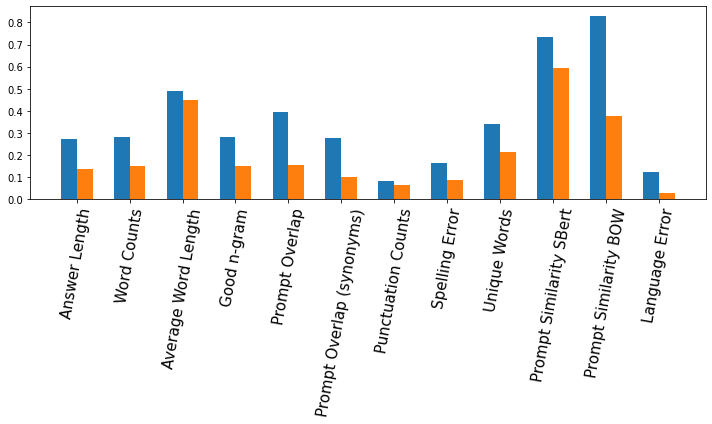

In [26]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [27]:
idx1 = 6
idx2 = 1015

In [28]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  16
Un Patience @CAPS1.   My name is @CAPS2 and I have a very hipper non patience horse named @CAPS1. @CAPS1 is a chestnut quarter horse with a white star on his forehead who is very un patient. He is always hipper and ready to go. For example when we are getting ready to go on a horse ride in our back trains he dose not stand still when I am tacking him up at the post. And when we are on the ride he always is so far up ahead that I have to stop him to wait for the group. And thats when he gets unpatient. No matter what he will not stand still and wait for the group so I have to spin him around and walk back to the group. Meany times I have tried training him to be patient but I have always failed. I guess he just always has to be doing something. But I will always love him no matter how un patience he is.
-------------------------------------------------------------------
Score :  2
I show loyalty a lot of peolpe that I no and they show me loyalty.


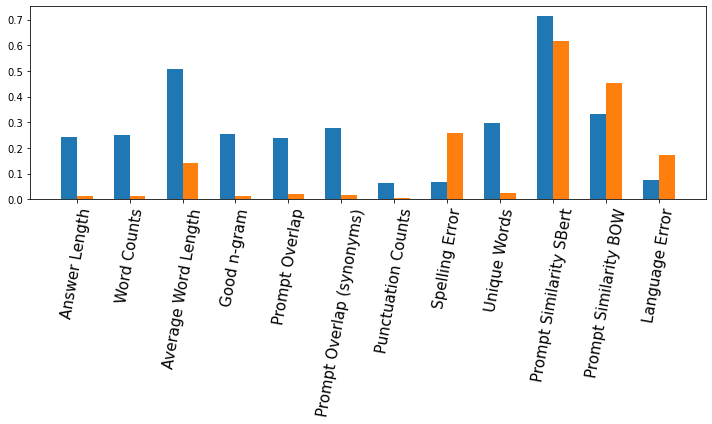

In [29]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [31]:
print("Score : ", traits.loc[843]['domain1_score'])
print(traits.loc[843]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[956]['domain1_score'])
print(traits.loc[956]['essay'])

Score :  24
Heres a story about time when I was patient. So the story begins at art prize and loved to see the beautiful art there, but I was dieing to see the winnig picture for art prize. My parent told me to wait until we all see the rest of the art prize amazing art. So I signed and replyed ok we can see the rest of the art prize things first.  While we were looking at the art the whole time I was thinking about the winning piece. That is all I thought about. ??? A little bit later. I was thinking of what a blessing it is to be here at art prize. So I checied up and disieded patience is good. And if you wait for something for a while it all of a sodden it seems more valuable.  A couple hours later I started to head to the car, and my mom intrupted and said, @CAPS1 dont you want to see the winning piece of art? @CAPS2 yes I forget.@CAPS3 there is not a line now so when we go to see it there was no line. I was the most amazing thing I have ever seen. It was a picture of sergean

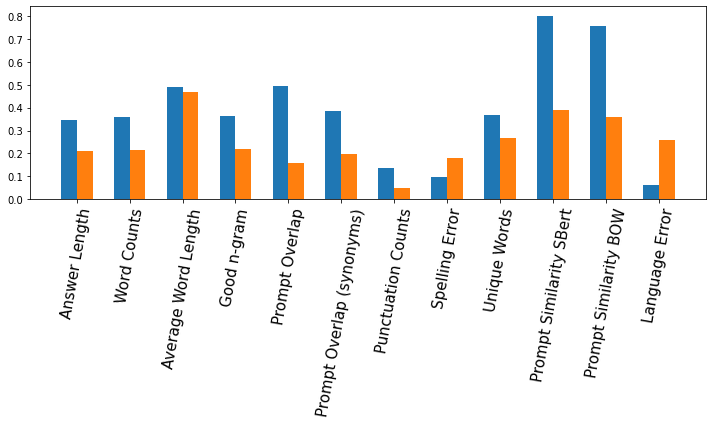

In [32]:
a = x_normed[843][:12]
b = x_normed[956][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### 5. UMAP

### nearest essay-pair

#### MinMax

In [33]:
idx1 = 184
idx2 = 1415

In [34]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  16
Did you know that patients are one of the key to happiness. For an example I was walking and @CAPS1 this guy walked up. To and started talking to me about his family (just remember I wasnt very patient at the time.) @CAPS1 he kept going on and on until I snaped and said do you know to shut up! badly he said yes @CAPS1 ran home., crying. @CAPS1 I went home and when I got home I felt sad for the guy, @CAPS1 said sorry.! And for some reason he said got you I said what I was so mad but I was happy when it was over. But that taught me a lesson though, always be patient because you don`t know who watching, literally.
-------------------------------------------------------------------
Score :  24
Patience is the ability to be tolerant,understanding and face difficulties without complaining. Patience isnt  something they teach you in my school. There isnt a book your assigned to read called  patience @NUM1,there is no movie called patience is the key. Non of that exist

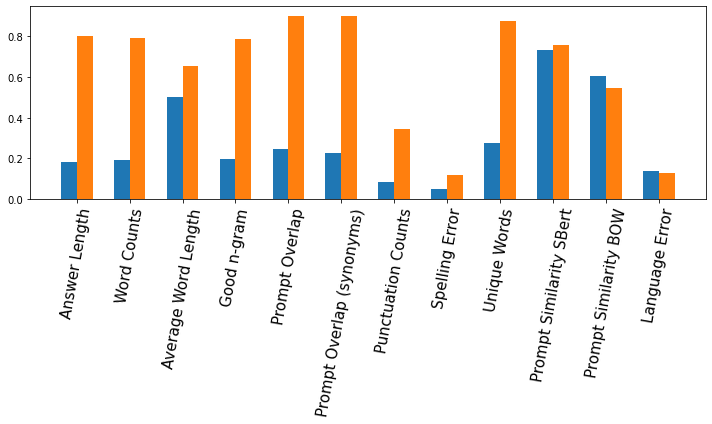

In [35]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [38]:
idx1 = 692
idx2 = 1091

In [39]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  12
Before,when i had to go to the doctor, I had  to wait fourty minutes. So i just played my @CAPS1. I was playing  mario cart.I got board so i just fell asleep. My mom woke me up because it was time. So we went in did my apointment and went home. Then we had to wait twenty minuts for my dad to get home from work.
-------------------------------------------------------------------
Score :  10
Write about a time when I was patient. At my old school before this school I was patient all the @NUM1 in some @NUM2 jump people in I told them to gone than they want to fight so am holding my patients in the teachers was talking to them about in I saw tham outside of the in they did not do anything to me so how I no they was fighting to make the school happy.


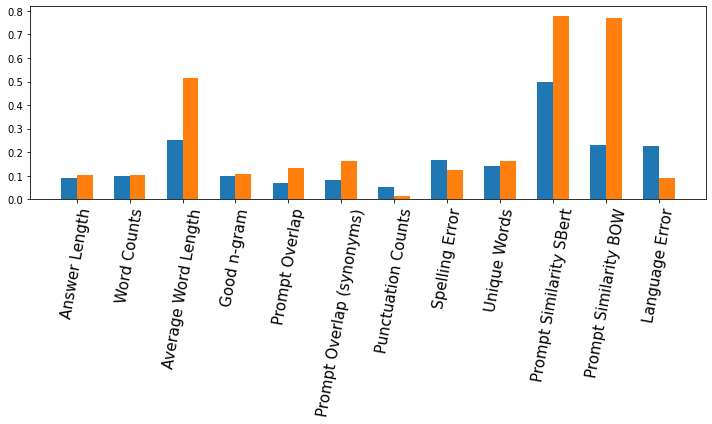

In [40]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [42]:
print("Score : ", traits.loc[143]['domain1_score'])
print(traits.loc[143]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[1306]['domain1_score'])
print(traits.loc[1306]['essay'])

Score :  7
To me when some one is being patient they are in line or waiting for something and they're being very calm. Where they aren't rushed and are very quiet.
-------------------------------------------------------------------
Score :  16
So one day in fifth grade I was running around playing tag on the play ground when  push  I got push off the slide a bout a ???fell and back my arm so it went ??? or they in pain so ??? went to the doctors and waited for two hours and I just sat patient by not moving my arm at all watching other people walk in and out finily they called my name they told me my arm was broken out the could not put cast on there to we went to the other doctor across the rode waited @NUM1 minutes and got a blue cast about a month later I got it taken off went back to the x ray room but then said I have to cast it up again this time I got ??? and eventily to got it taken off and thats the time I was patient.


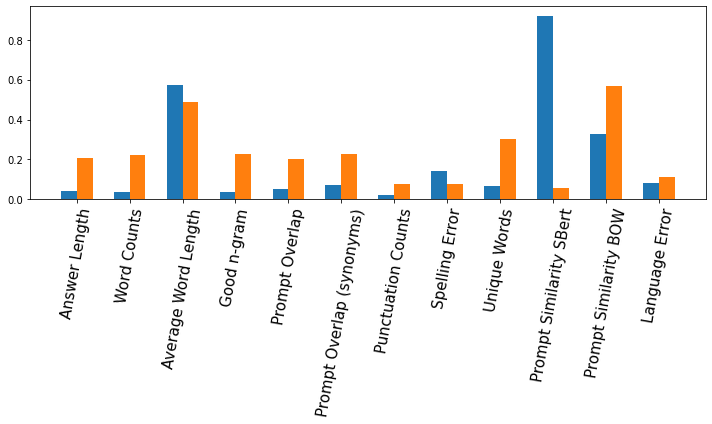

In [43]:
a = x_normed[143][:12]
b = x_normed[1306][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### 6. Diffusion Map

### nearest essay-pair

#### MinMax

In [46]:
idx1 = 50
idx2 = 1396

In [47]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  8
You have to be paceint when you are cooking some cookies. It takes a long time to cook cookies. You have to be pacient when you are waiting to play a game. And you have to be pacint in the watting room until they call your name. You have to be pacint when you get out in a game you have to be pacint to get @CAPS1 in. When you get a home run you have to be pacint when they try to get the ball. For exaple the game of the sorry you have to be pacint to get the card @NUM1, @NUM2 if you get a one then you can get out of the house. if you get a to then you get out and get anouther turn.
-------------------------------------------------------------------
Score :  9
When my friend was getting his meds I waited until he got ready, I was seating to wait for him. I was getting my phone down loud @PERSON2 ping pong and uplift. I was looking for @PERSON1 and I was waiting for him to be done.


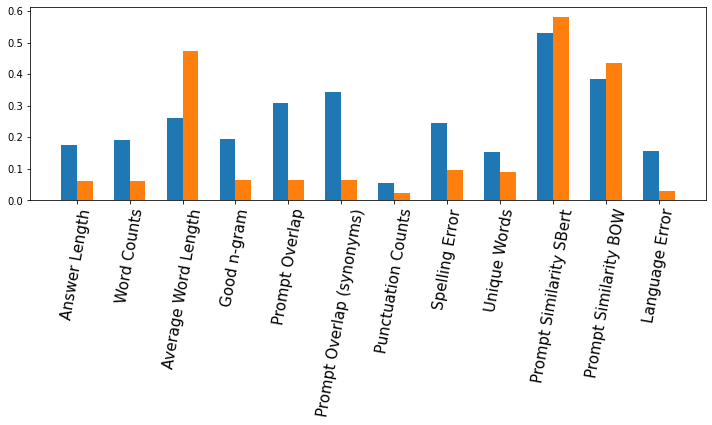

In [48]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [51]:
idx1 = 73
idx2 = 962

In [52]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  12
Patience, what do you think when you hear that word? When I was little I always thought it would be simply impossible to have a thing like that, but after I badly hurt my ankle and was pat in a cast and on crutches for four months, I really got the hang of it. My mom would always say patience is vertue, have you ever wondered what it takes to have patience? Well its really just the ability to control your self, you have to be able to get through tough situations and still be controlling yourself, and you really have to control yourself when people annoy you of things take awhile
-------------------------------------------------------------------
Score :  9
One time I were a patient was when I broke my arm. I was there for @NUM1. I was playing outside and was climbing a pole and I droped down and I put a @CAPS1 on it and it swore up. My doctor was very peaceful. And nice. In conclusion this is a time I was a patient


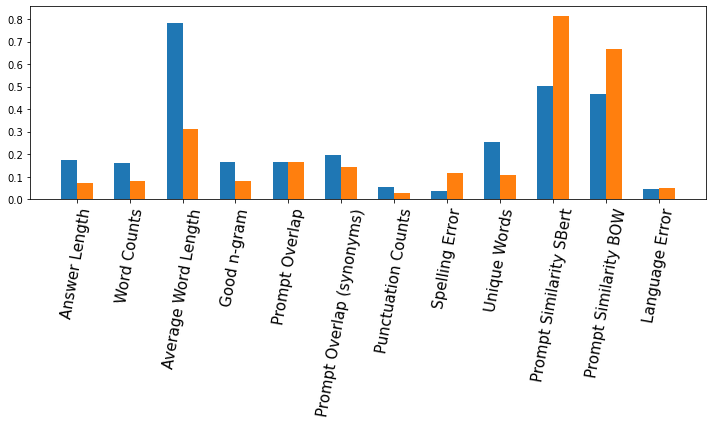

In [53]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [54]:
print("Score : ", traits.loc[50]['domain1_score'])
print(traits.loc[50]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[381]['domain1_score'])
print(traits.loc[381]['essay'])

Score :  8
You have to be paceint when you are cooking some cookies. It takes a long time to cook cookies. You have to be pacient when you are waiting to play a game. And you have to be pacint in the watting room until they call your name. You have to be pacint when you get out in a game you have to be pacint to get @CAPS1 in. When you get a home run you have to be pacint when they try to get the ball. For exaple the game of the sorry you have to be pacint to get the card @NUM1, @NUM2 if you get a one then you can get out of the house. if you get a to then you get out and get anouther turn.
-------------------------------------------------------------------
Score :  20
@CAPS1  @PERSON1, its @PERSON3 how are u?  Im @CAPS5, @CAPS24s upp? @CAPS27, im calling you to ask, if u wanna go to @CAPS2 @CAPS3 with men?  @CAPS4 yah!  I havent went in a long time!  hold on lemme ask. @CAPS5. As I explained to her @CAPS24 is happening . @CAPS5, my grandmas gonna come pick you up? 

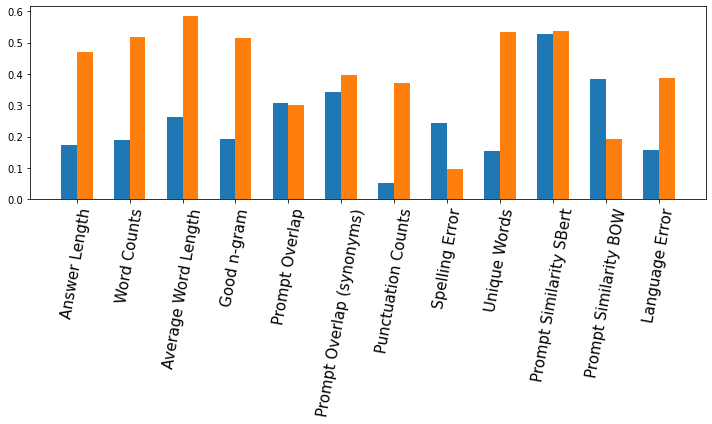

In [55]:
a = x_normed[50][:12]
b = x_normed[381][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

## Intrepretable Model

In [6]:
def get_feature_names_extended():
    ease_feats = ['Answer Length', 'Word Counts', 'Average Word Length', 'Good n-gram', 'Prompt Overlap', 
              'Prompt Overlap (synonyms)', 'Punctuation Counts', 'Spelling Error', 'Unique Words', 'Prompt Similarity SBert']        

    sbert_feats = []
    sbert_dim = 768

    for i in range(0, sbert_dim):
    	fname = "sbert_" + str(i) 
    	sbert_feats.append(fname)
    
    prompt_similarity_bow = ["Prompt Similarity BOW"]
    lang_error = ["Language Error"]
    
    feature_names = ease_feats + prompt_similarity_bow + lang_error + sbert_feats 
    #print("len feature names: ", len(feature_names))
    
    return feature_names

In [7]:
feature_names = get_feature_names_extended()
feats = feature_names[:12]

In [59]:
joblib.dump(feats, 'feat_names12')

['feat_names12']